In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Data')

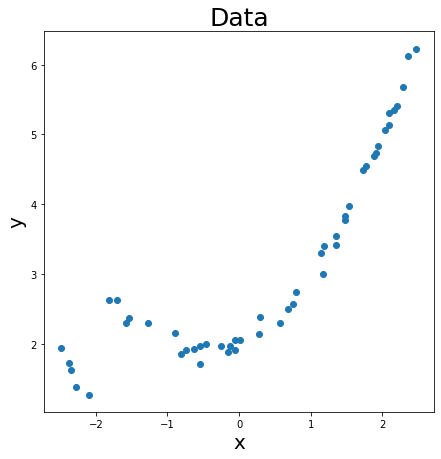

In [4]:
numvals = 50
true_w = 0.5

xvals = np.sort(5*(np.random.random(numvals) - 0.5))
yvals = true_w*(xvals + xvals**2) + np.random.normal(0, 0.1, numvals)
yvals[int(numvals*0.1):] += 2

plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Data', fontsize=25)

# Model

## $\hat{y} = w(x + x^2)$

# Loss Function

## $ L(y,\hat{y}) = \sum_{i=1}^{n}(\hat{y}_i - y_i)^2$

## $ L(y,x,w) = \sum_{i=1}^{n}(wx_i + wx_i^2 - y_i)^2$

## $ \frac{dL}{dw} = \sum_{i=1}^{n}2(x_i + x_i^2)(wx_i + wx_i^2 - y_i)$

In [5]:
def get_loss(w, xvals, yvals):
    return np.sum((w*xvals + w*xvals**2 - yvals)**2)

In [6]:
def get_gradient(w, xvals, yvals):
    grad = np.sum(2*(xvals + xvals**2)*(w*xvals + w*xvals**2 - yvals))
    return grad

Text(0.5, 1.0, 'Loss Function')

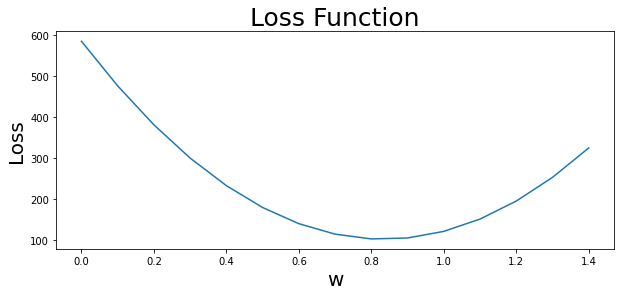

In [7]:
wvals = np.arange(0,1.5,0.1)
lossvals = [get_loss(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, lossvals)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Loss Function', fontsize=25)

Text(0.5, 1.0, 'Gradient')

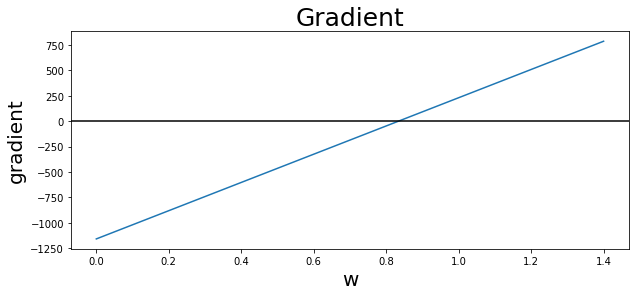

In [8]:
gradvals = [get_gradient(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, gradvals)
plt.axhline(0, color='k')
plt.xlabel('w', fontsize=20)
plt.ylabel('gradient', fontsize=20)
plt.title('Gradient', fontsize=25)

In [9]:
def perform_gradient_descent(init_w, eta, num_iters, get_gradient):
    #initial value of w
    w_vals = [init_w]
    
    #for a fixed number of iterations
    for _ in range(num_iters):
        #get get gradient, 
        #w_vals[-1] is the previous weight
        grad = get_gradient(w_vals[-1], xvals, yvals)
        
        #travel in the direction of the gradient
        w_vals.append(w_vals[-1] - eta*grad)
    return w_vals

Text(0.5, 1.0, 'Gradient Descent Progress\nFinal w: 0.83')

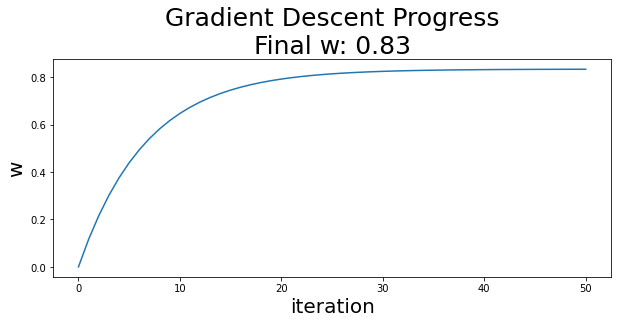

In [10]:
w_vals = perform_gradient_descent(0, 0.0001, 50, get_gradient)

plt.figure(figsize=(10,4))
plt.plot(w_vals)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('w', fontsize=20)
plt.title('Gradient Descent Progress\nFinal w: %s'%round(w_vals[-1],2), fontsize=25)

Text(0.5, 1.0, 'Not Fitted Model')

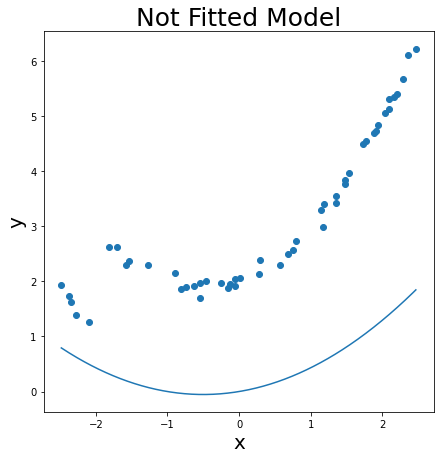

In [27]:
xrange = np.arange(xvals.min(), xvals.max(), 0.01)
pred_yvals_loss1 = w_vals[-49]*(xrange + xrange**2)

plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
plt.plot(xrange, pred_yvals_loss1)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Not Fitted Model', fontsize=25)

Text(0.5, 1.0, 'Fitted Model')

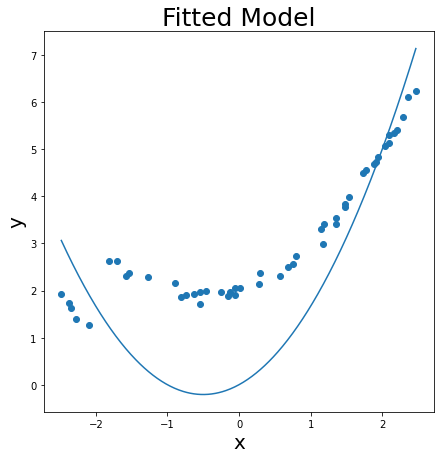

In [28]:
xrange = np.arange(xvals.min(), xvals.max(), 0.01)
pred_yvals_loss1 = w_vals[-1]*(xrange + xrange**2)

plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
plt.plot(xrange, pred_yvals_loss1)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Fitted Model', fontsize=25)

# Custom Loss Function

## $ L(y,\hat{y}) = \sum_{i=1}^{n}e^{-i}(\hat{y}_i - y_i)^2$

## $ L(y,x,w) = \sum_{i=1}^{n}e^{-i}(wx_i + wx_i^2 - y_i)^2$

## $ \frac{dL}{dw} = \sum_{i=1}^{n}2e^{-i}(x_i + x_i^2)(wx_i + wx_i^2 - y_i)$

In [10]:
def get_loss(w, xvals, yvals):
    ivals = np.arange(1,len(xvals)+1)
    return np.sum(np.exp(-ivals)*(w*xvals + w*xvals**2 - yvals)**2)

In [11]:
def get_gradient(w, xvals, yvals):
    ivals = np.arange(1,len(xvals)+1)
    grad = np.sum(2*np.exp(-ivals)*(xvals + xvals**2)*(w*xvals + w*xvals**2 - yvals))
    return grad

Text(0.5, 1.0, 'Loss Function')

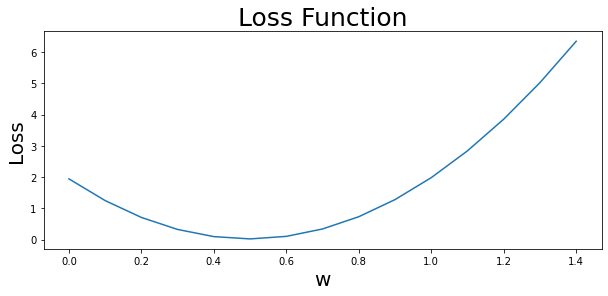

In [12]:
wvals = np.arange(0,1.5,0.1)
lossvals = [get_loss(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, lossvals)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Loss Function', fontsize=25)

Text(0.5, 1.0, 'Gradient')

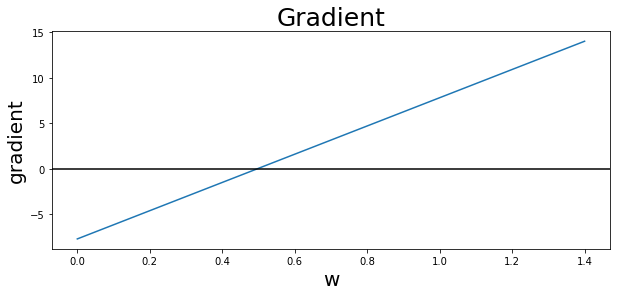

In [13]:
wvals = np.arange(0,1.5,0.1)
gradvals = [get_gradient(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, gradvals)
plt.axhline(0, color='k')
plt.xlabel('w', fontsize=20)
plt.ylabel('gradient', fontsize=20)
plt.title('Gradient', fontsize=25)

In [14]:
def perform_gradient_descent(init_w, eta, num_iters, get_gradient):
    w_vals = [init_w]
    for _ in range(num_iters):
        grad = get_gradient(w_vals[-1], xvals, yvals)
        w_vals.append(w_vals[-1] - eta*grad)
    return w_vals

Text(0.5, 1.0, 'Gradient Descent Progress\nFinal w: 0.5')

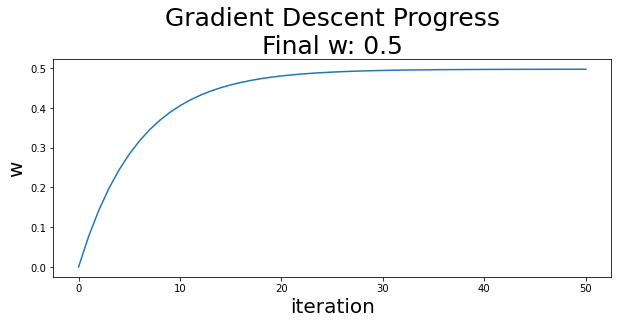

In [15]:
w_vals = perform_gradient_descent(0, 0.01, 50, get_gradient)

plt.figure(figsize=(10,4))
plt.plot(w_vals)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('w', fontsize=20)
plt.title('Gradient Descent Progress\nFinal w: %s'%round(w_vals[-1],2), fontsize=25)

Text(0.5, 1.0, 'Fitted Model')

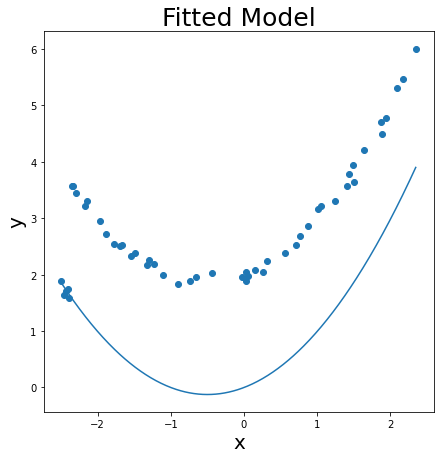

In [16]:
xrange = np.arange(xvals.min(), xvals.max(), 0.01)
pred_yvals_loss2 = w_vals[-1]*(xrange + xrange**2)

plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
plt.plot(xrange, pred_yvals_loss2)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Fitted Model', fontsize=25)

# Compare Results

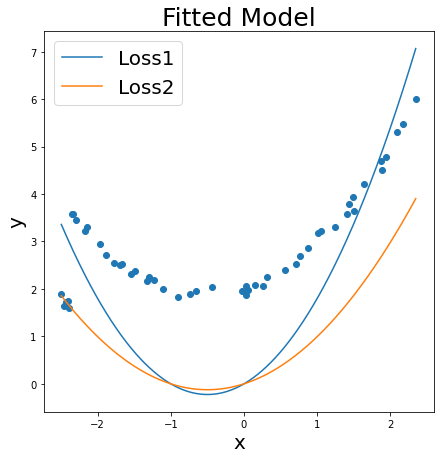

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
p1, = plt.plot(xrange, pred_yvals_loss1)
p2, = plt.plot(xrange, pred_yvals_loss2)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Fitted Model', fontsize=25)
plt.legend((p1,p2), ['Loss1', 'Loss2'], fontsize=20)